#  Importing the required libraries

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import train_test_split

# Reading the dataset, making a copy and observation of dataset

In [2]:
#reading the data-set and making a copy and working on it
bike_df=pd.read_csv(r'bike_rent.csv')
bike_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,11,108,119
17375,17376,31-12-2012,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89
17376,17377,31-12-2012,springer,2012,12,21,No,1,Working Day,Clear,?,0.2576,0.6,0.1642,7,83,90
17377,17378,31-12-2012,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
# cehcnking the nature of dataset - initial 10
bike_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1
5,6,01-01-2011,springer,2011,1,5,No,6,No work,Mist,0.24,0.2576,0.75,0.0896,0,1,1
6,7,01-01-2011,springer,2011,1,6,No,6,No work,?,0.22,0.2727,0.8,0,2,0,2
7,8,01-01-2011,springer,2011,1,7,No,6,No work,Clear,0.2,0.2576,0.86,0,1,2,3
8,9,01-01-2011,springer,2011,1,8,No,6,No work,Clear,0.24,0.2879,0.75,0,1,7,8
9,10,01-01-2011,springer,2011,1,9,No,6,No work,Clear,?,0.3485,0.76,0,8,6,14


In [4]:
# cehcnking the nature of dataset - last 10
bike_df.tail(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17369,17370,31-12-2012,springer,2012,12,14,No,1,Working Day,Mist,0.28,0.2727,0.45,0.2239,62,185,247
17370,17371,31-12-2012,springer,2012,12,15,No,1,Working Day,Mist,0.28,0.2879,0.45,0.1343,69,246,315
17371,17372,31-12-2012,springer,2012,12,16,?,1,Working Day,Mist,0.26,?,0.48,0.194,30,184,214
17372,17373,31-12-2012,springer,2012,?,17,No,1,Working Day,Mist,0.26,0.2879,0.48,0.0896,14,150,164
17373,17374,31-12-2012,springer,2012,12,18,No,1,Working Day,Mist,0.26,0.2727,0.48,0.1343,10,112,122
17374,17375,31-12-2012,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,11,108,119
17375,17376,31-12-2012,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89
17376,17377,31-12-2012,springer,2012,12,21,No,1,Working Day,Clear,?,0.2576,0.6,0.1642,7,83,90
17377,17378,31-12-2012,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,31-12-2012,springer,2012,12,23,No,1,?,Clear,0.26,0.2727,0.65,0.1343,12,37,49


In [5]:
#information of uique values in each column
bike_df.nunique()

instant       17379
dteday          731
season            5
yr                3
mnth             13
hr               24
holiday           3
weekday           7
workingday        3
weathersit        5
temp             51
atemp            66
hum              90
windspeed        31
casual          323
registered      777
cnt             869
dtype: int64

In [6]:
# information regrding the null values count, coulns and datatypes of each columns
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


In [7]:
# checking for the null values present in the datafeame
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values found, but through observations we can make out that there are null values in the form of "?".
therefore, to consider "?" as missing data, we shall replace it with NaN

In [8]:
bike_df.replace("?", float(np.nan), inplace=True)

In [9]:
bike_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,NaN,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


In [10]:
bike_df.isnull().sum()

instant        0
dteday         0
season         6
yr             1
mnth           1
hr             0
holiday        1
weekday        0
workingday     5
weathersit     4
temp          11
atemp          6
hum            6
windspeed      5
casual         1
registered     1
cnt            0
dtype: int64

In [11]:
# checking the rows and columns of the dataset
bike_df.shape

(17379, 17)

In [12]:
# As the maximum NaN values is 11, it is very negligible percent of the whole dataset adn so we are dropping the NaN values 
bike_df1 = bike_df.dropna()

In [13]:
bike_df1.shape

(17339, 17)

In [14]:
bike_df1.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
bike_df1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
bike_df1.dtypes

instant        int64
dteday        object
season        object
yr            object
mnth          object
hr             int64
holiday       object
weekday        int64
workingday    object
weathersit    object
temp          object
atemp         object
hum           object
windspeed     object
casual        object
registered    object
cnt            int64
dtype: object

In [17]:
#typecasting
bike_df1['dteday'] = pd.to_datetime(bike_df1['dteday'])

In [18]:
# Typecasting
bike_df1 = bike_df1.astype({
    'season': 'category',
    'yr':'category',
    'mnth': 'int64',
    'hr': 'int64',
    'holiday': 'category',
    'weekday': 'int64',
    'workingday': 'category',
    'weathersit': 'category',
    'temp': 'float64',
    'atemp': 'float64',
    'hum': 'float64',
    'windspeed': 'float64',
    'casual': 'float64',
    'registered': 'float64'
})

In [19]:
bike_df1.dtypes

instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                   int64
hr                     int64
holiday             category
weekday                int64
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual               float64
registered           float64
cnt                    int64
dtype: object

In [20]:
bike_df1.drop(['instant', 'dteday'], axis=1, inplace=True)

# Basic visualisations

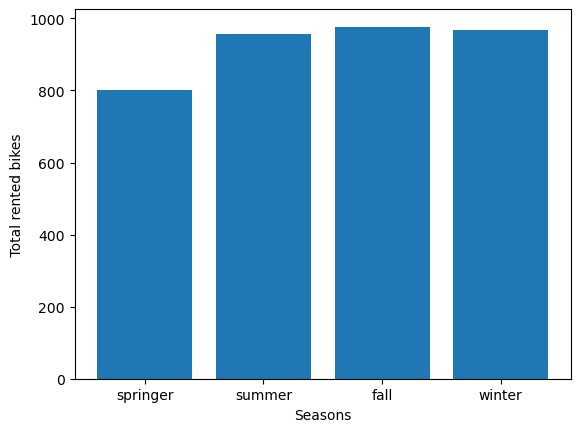

In [21]:
#season wise total bike rented
plt.bar(bike_df1["season"],bike_df1["cnt"],)
# plt.title("Seasn wise total bike rented")
plt.ylabel(' Total rented bikes ')
plt.xlabel('Seasons')
plt.show()

# Total bikes rented are more in fall seson, and next comes the winter and summer.

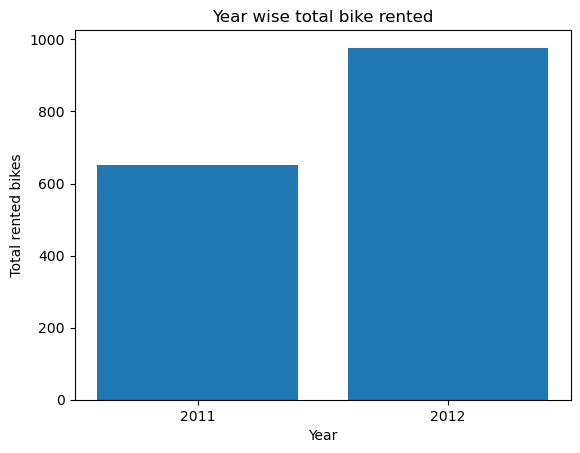

In [22]:
#year wise bike rented
plt.bar(bike_df1["yr"],bike_df1["cnt"],)
plt.title("Year wise total bike rented")
plt.ylabel(' Total rented bikes ')
plt.xlabel('Year')
plt.show()

# Total bikes rented are more in Year 2012.

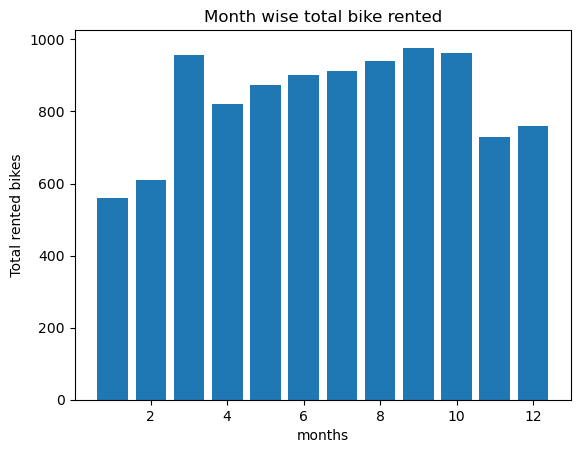

In [23]:
#Total bikes rented in month wise
plt.bar(bike_df1["mnth"],bike_df1["cnt"],)
plt.title("Month wise total bike rented")
plt.ylabel(' Total rented bikes ')
plt.xlabel('months')
plt.show()

# Bikes rented are at maximum in the month of March [3rd month] . and then comes the September, october and August.

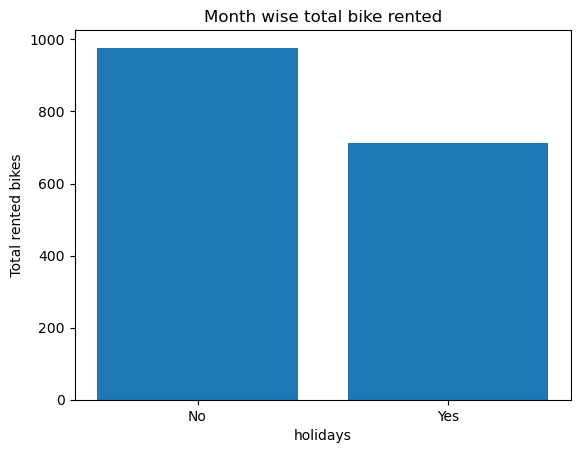

In [24]:
#total bikes rented with respected to holidays
plt.bar(bike_df1["holiday"],bike_df1["cnt"],)
plt.title("Month wise total bike rented")
plt.ylabel(' Total rented bikes ')
plt.xlabel('holidays')
plt.show()

# Bikes rented are maximum on non-holiday days. 

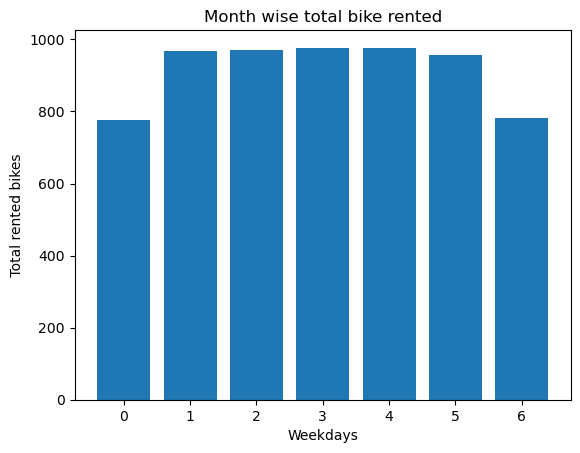

In [25]:
#total bikes rented with respected to weekdays
plt.bar(bike_df1["weekday"],bike_df1["cnt"],)
plt.title("Month wise total bike rented")
plt.ylabel(' Total rented bikes ')
plt.xlabel('Weekdays')
plt.show()

# The bike rent was maximum on weekdays.

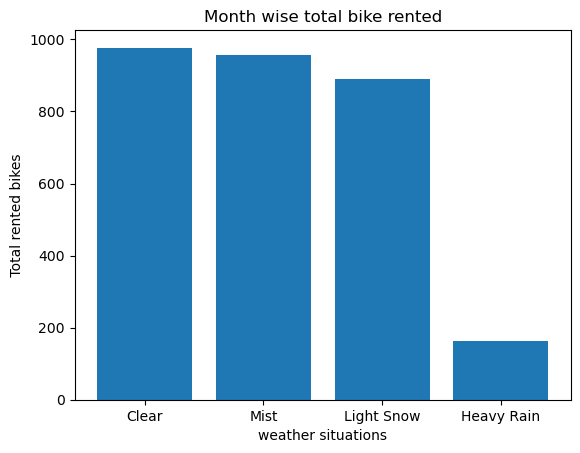

In [26]:
#total bikes rented with respected to weather situations
plt.bar(bike_df1["weathersit"],bike_df1["cnt"],)
plt.title("Month wise total bike rented")
plt.ylabel(' Total rented bikes ')
plt.xlabel('weather situations')
plt.show()

# The bike renting was at peak in Clear weather situations.

In [27]:
# total of registered and unregistered(casual) users
Registered=bike_df1['registered'].sum()
Unregistered_casual=bike_df1['casual'].sum()
graph=[Registered,Unregistered_casual]
print(graph)

[2670313.0, 619473.0]


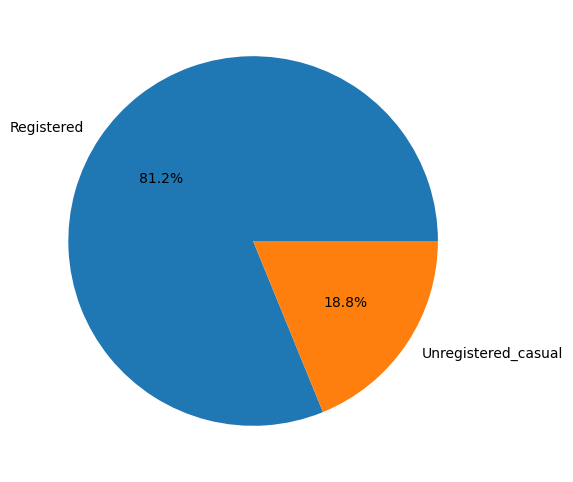

In [28]:
plt.figure(figsize=(6,6))
plt.pie(graph,labels = ["Registered", "Unregistered_casual"],autopct ='%1.1f%%')
plt.show()

# From the pie chart, it is clearly evident that there are 2670313.0 (81.2%) Registered users and 619473.0(18.8%) Unregistered or casual users.

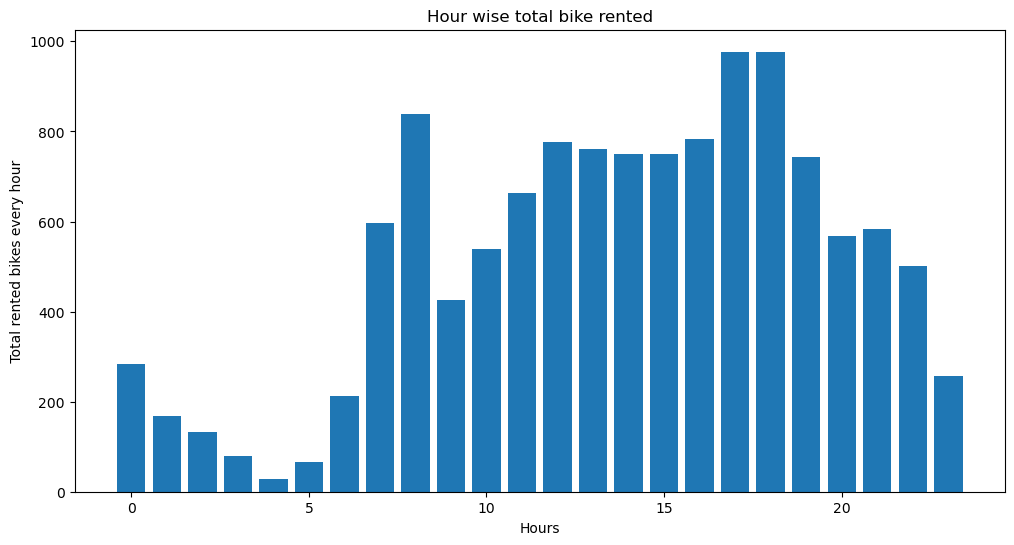

In [29]:
#hour wise total bike rented
plt.figure(figsize=(12,6))
plt.bar(bike_df1["hr"],bike_df1["cnt"])
plt.title("Hour wise total bike rented")
plt.ylabel(' Total rented bikes every hour ')
plt.xlabel('Hours')
plt.show()

# Maximum bikes were rented between 11th to 21st hour and it is at peak in 17th(5PM), 18th(6PM) and 8th(8AM) hour of the day.

<AxesSubplot:>

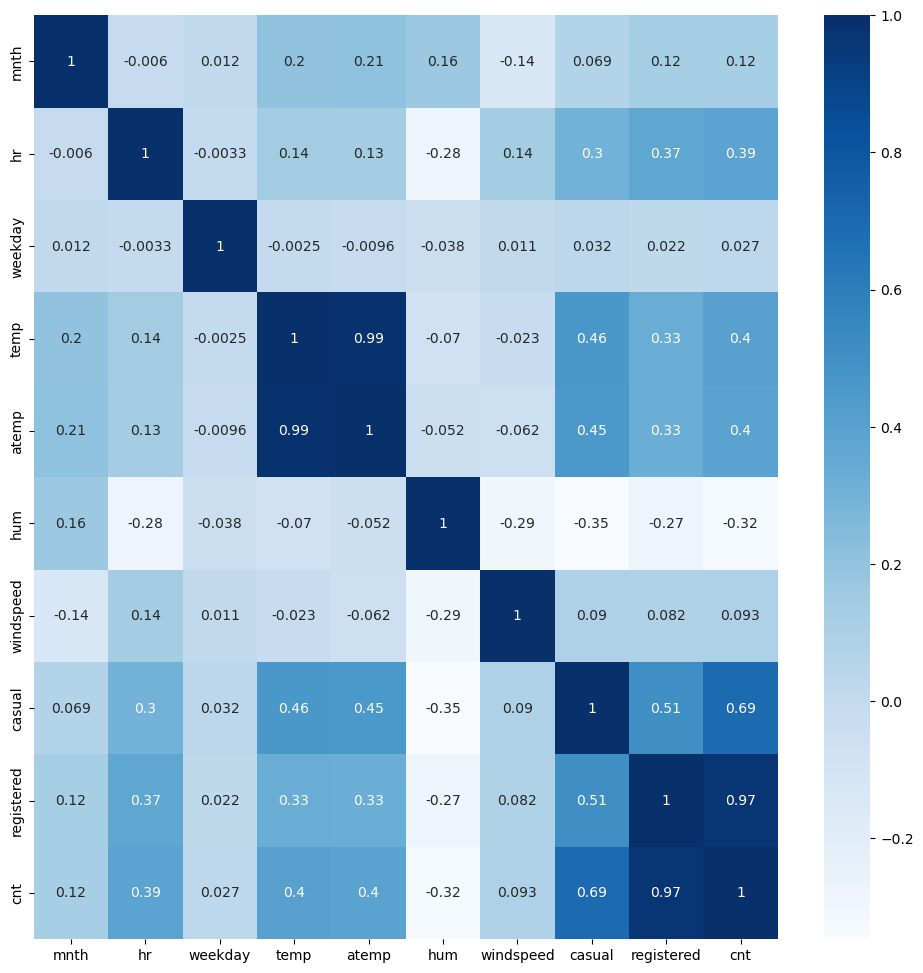

In [30]:
#checking for the correlation between the columns
plt.figure(figsize=(12,12))
corr=bike_df1.corr()
sns.heatmap(corr,annot = True, cmap='Blues')

1. Registered column and Cnt column are highly corelated (0.97) and therefore any one can be dropped.
2. Temp column and Atemp column are also highly cocrelated(0.99) and therefore any one can be dropped.
3. Cnt column are also strongly  corelated  with casual column (0.69).
4. Cnt column is negatively corelated with hum column(-0.32) and holiday column(-0.03).
5. Temp and Atemp are positively coreated with cnt column (0.4) 

In [31]:
bike_df1.drop(['registered', 'atemp', 'yr'], axis=1, inplace=True)

In [32]:
bike_df1.columns

Index(['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'cnt'],
      dtype='object')

In [33]:
bike_df1.shape

(17339, 12)

# Finding and handeling the outliers

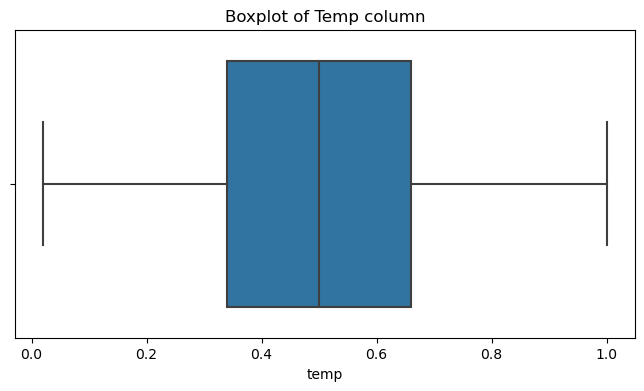

In [34]:
# boxplot of temp column
plt.figure(figsize=(8,4))
sns.boxplot(bike_df1['temp'])
plt.title("Boxplot of Temp column")
plt.show()

No outliers found in Temp column

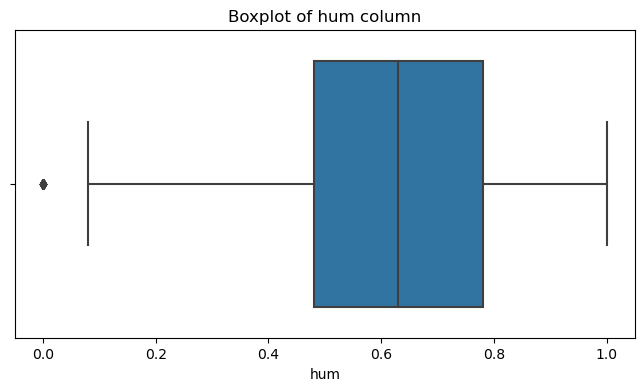

In [35]:
# boxplot of hum column
plt.figure(figsize=(8,4))
sns.boxplot(bike_df1['hum'])
plt.title("Boxplot of hum column")
plt.show()

Only one outlier is found in hum column and can be neglected or can be found and deleted. since it is neglegible, we hvae ignored it

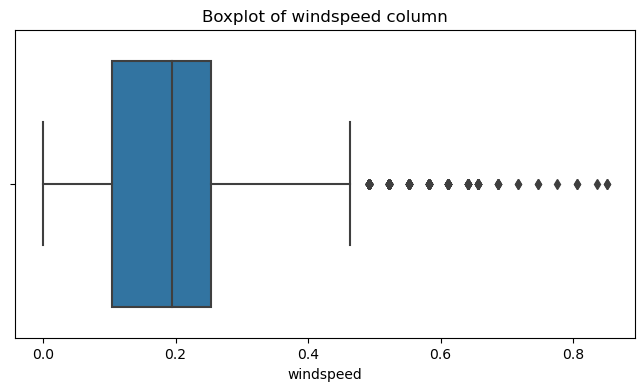

In [36]:
# boxplot of windspeed column
plt.figure(figsize=(8,4))
sns.boxplot(bike_df1['windspeed'])
plt.title("Boxplot of windspeed column")
plt.show()

13 outliers are found in Windspeed column and can be neglected or can be found and deleted. since it is neglegible, we hvae ignored it

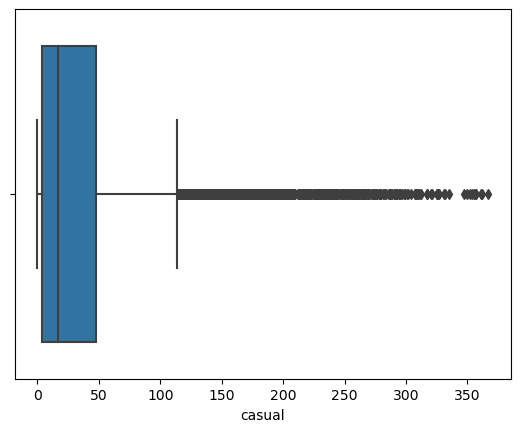

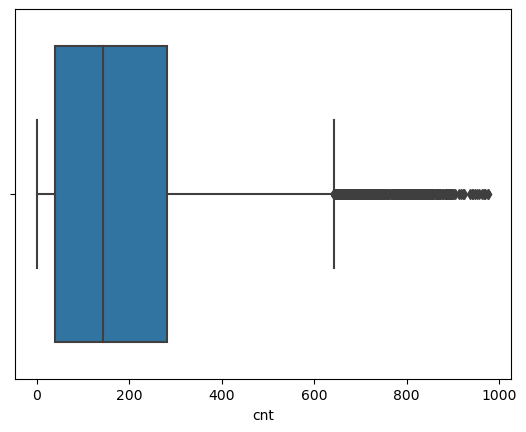

In [37]:
numerical_vars= ['casual', 'cnt']
for col in numerical_vars:
    sns.boxplot(bike_df1[col])
    plt.show()

Treating the outliers using Winsorizing method This process involves replacing the extreme values with the next highest or lowest value within a specified range.

In [38]:
from scipy.stats.mstats import winsorize

list_attributes = ['casual', 'cnt']

for attribute in list_attributes:
    q1 = bike_df1[attribute].quantile(0.25)
    q3 = bike_df1[attribute].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    bike_df1[attribute] = winsorize(bike_df1[attribute], limits=(0.05, 0.05))

This code loops through the list of attributes and for each attribute, it calculates the IQR and the upper and lower bounds for outliers.

It then uses the winsorize function from scipy.stats.mstats to winsorize the data for that attribute with a limit of 5% on each side.

# Feature selection

# 1. Feature selection using "correlation"

In [39]:
bike_df1.corr()

,mnth,hr,weekday,temp,hum,windspeed,casual,cnt
mnth,1.000000,-0.006027,0.011873,0.203789,0.164705,-0.136210,0.083533,0.123150
hr,-0.006027,1.000000,-0.003263,0.138133,-0.276567,0.136776,0.352937,0.415292
weekday,0.011873,-0.003263,1.000000,-0.002482,-0.037595,0.011040,0.022973,0.027550
temp,0.203789,0.138133,-0.002482,1.000000,-0.069647,-0.023301,0.517331,0.415268
hum,0.164705,-0.276567,-0.037595,-0.069647,1.000000,-0.289933,-0.374710,-0.333733
windspeed,-0.136210,0.136776,0.011040,-0.023301,-0.289933,1.000000,0.096378,0.097876
casual,0.083533,0.352937,0.022973,0.517331,-0.374710,0.096378,1.000000,0.748859
cnt,0.123150,0.415292,0.027550,0.415268,-0.333733,0.097876,0.748859,1.000000


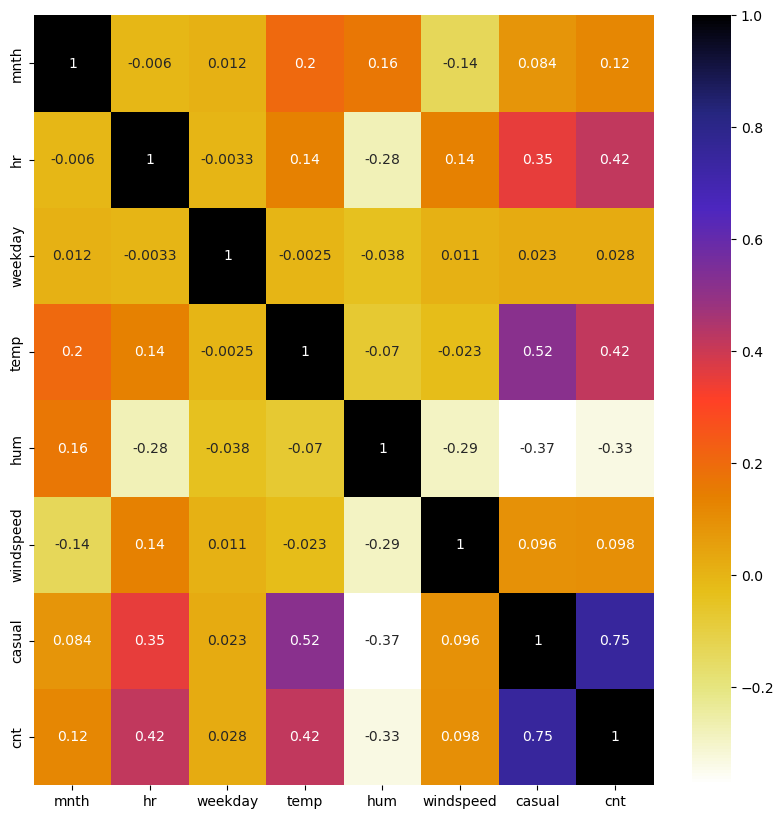

In [40]:
#Using Pearson Correlation
plt.figure(figsize=(10,10))
cor = bike_df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [41]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with any other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [42]:
corr_features = correlation(bike_df1, 0.9)
len(set(corr_features))

0

In [43]:
corr_features

set()

# CORRELATION - There are no columns which are corelated to each other. i,e; All the columns are unique and important.

### Chi2 test requires all the variables to be numeric and thus, performing one hot encoding

# Encoding the categorical vairables - One hot encoding

In [44]:
cat_col = ['season', 'holiday', 'workingday', 'weathersit']
bike_df2=pd.get_dummies(bike_df1, columns=cat_col)
bike_df2

,mnth,hr,weekday,temp,hum,windspeed,casual,cnt,season_fall,season_springer,season_summer,season_winter,holiday_No,holiday_Yes,workingday_No work,workingday_Working Day,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist
0,1,0,6,0.24,0.81,0.0000,3.0,16,0,1,0,0,1,0,1,0,1,0,0,0
1,1,1,6,0.22,0.80,0.0000,8.0,40,0,1,0,0,1,0,1,0,1,0,0,0
3,1,3,6,0.24,0.75,0.0000,3.0,13,0,1,0,0,1,0,1,0,1,0,0,0
4,1,4,6,0.24,0.75,0.0000,0.0,5,0,1,0,0,1,0,1,0,1,0,0,0
5,1,5,6,0.24,0.75,0.0896,0.0,5,0,1,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,12,15,1,0.28,0.45,0.1343,69.0,315,0,1,0,0,1,0,0,1,0,0,0,1
17373,12,18,1,0.26,0.48,0.1343,10.0,122,0,1,0,0,1,0,0,1,0,0,0,1
17374,12,19,1,0.26,0.60,0.1642,11.0,119,0,1,0,0,1,0,0,1,0,0,0,1
17375,12,20,1,0.26,0.60,0.1642,8.0,89,0,1,0,0,1,0,0,1,0,0,0,1


In [45]:
bike_df2.columns

Index(['mnth', 'hr', 'weekday', 'temp', 'hum', 'windspeed', 'casual', 'cnt',
       'season_fall', 'season_springer', 'season_summer', 'season_winter',
       'holiday_No', 'holiday_Yes', 'workingday_No work',
       'workingday_Working Day', 'weathersit_Clear', 'weathersit_Heavy Rain',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [46]:
bike_df2.head()

,mnth,hr,weekday,temp,hum,windspeed,casual,cnt,season_fall,season_springer,season_summer,season_winter,holiday_No,holiday_Yes,workingday_No work,workingday_Working Day,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist
0,1,0,6,0.24,0.81,0.0000,3.0,16,0,1,0,0,1,0,1,0,1,0,0,0
1,1,1,6,0.22,0.80,0.0000,8.0,40,0,1,0,0,1,0,1,0,1,0,0,0
3,1,3,6,0.24,0.75,0.0000,3.0,13,0,1,0,0,1,0,1,0,1,0,0,0
4,1,4,6,0.24,0.75,0.0000,0.0,5,0,1,0,0,1,0,1,0,1,0,0,0
5,1,5,6,0.24,0.75,0.0896,0.0,5,0,1,0,0,1,0,1,0,0,0,0,1


In [47]:
bike_df2.shape

(17339, 20)

In [48]:
from sklearn.model_selection import train_test_split
x = bike_df2.drop('cnt', axis=1)
y = bike_df2['cnt']
print(x.shape)
print(y.shape)

(17339, 19)
(17339,)


In [49]:
##seperating data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((12137, 19), (5202, 19))

# 2. Feature selection using "Chi2"

In [50]:
## Perform chi2 test
### chi2 returns 2 values
### F-score and the p-value
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,Y_train) 

In [51]:
f_p_values

(array([1.46496703e+03, 1.97961158e+04, 8.01400570e+02, 2.08701895e+02,
        1.20451917e+02, 6.14797638e+01, 3.34935508e+05, 7.24929898e+02,
        1.08554769e+03, 5.15816294e+02, 4.94247215e+02, 1.80447449e+01,
        6.04140110e+02, 5.68453976e+02, 2.57911566e+02, 2.25253852e+02,
        3.38537824e+02, 5.99807779e+02, 4.25181541e+02]),
 array([1.49666544e-82, 0.00000000e+00, 5.45149746e-11, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.21284644e-06,
        3.01018259e-36, 8.99013620e-01, 9.75361061e-01, 1.00000000e+00,
        8.61799769e-02, 3.70350442e-01, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.07235945e-01, 9.99992323e-01]))

In [52]:
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

mnth                      1.496665e-82
hr                        0.000000e+00
weekday                   5.451497e-11
temp                      1.000000e+00
hum                       1.000000e+00
windspeed                 1.000000e+00
casual                    0.000000e+00
season_fall               2.212846e-06
season_springer           3.010183e-36
season_summer             8.990136e-01
season_winter             9.753611e-01
holiday_No                1.000000e+00
holiday_Yes               8.617998e-02
workingday_No work        3.703504e-01
workingday_Working Day    1.000000e+00
weathersit_Clear          1.000000e+00
weathersit_Heavy Rain     1.000000e+00
weathersit_Light Snow     1.072359e-01
weathersit_Mist           9.999923e-01
dtype: float64

In [53]:
chi_test = pd.DataFrame(p_values).T
chi_test.columns = x.columns
chi_test

,mnth,hr,weekday,temp,hum,windspeed,casual,season_fall,season_springer,season_summer,season_winter,holiday_No,holiday_Yes,workingday_No work,workingday_Working Day,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist
0,1.496665e-82,0.0,5.451497e-11,1.0,1.0,1.0,0.0,0.000002,3.010183e-36,0.899014,0.975361,1.0,0.08618,0.37035,1.0,1.0,1.0,0.107236,0.999992


# Chi2- The Chi2 test show all features(excludes Hr and casual) which can be used for furthere analysis.

# 3. Information gain - Mutual information In Regression

In [54]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), Y_train)
mutual_info

array([5.46520350e-02, 6.26466226e-01, 1.20183979e-02, 1.34883942e-01,
       9.90201984e-02, 1.11355100e-02, 7.06863808e-01, 2.32220113e-02,
       5.46131456e-02, 4.72088037e-03, 8.62986611e-03, 0.00000000e+00,
       0.00000000e+00, 4.53860014e-03, 4.00472104e-03, 0.00000000e+00,
       0.00000000e+00, 1.56017766e-02, 5.98110199e-04])

In [55]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

casual                    0.706864
hr                        0.626466
temp                      0.134884
hum                       0.099020
mnth                      0.054652
season_springer           0.054613
season_fall               0.023222
weathersit_Light Snow     0.015602
weekday                   0.012018
windspeed                 0.011136
season_winter             0.008630
season_summer             0.004721
workingday_No work        0.004539
workingday_Working Day    0.004005
weathersit_Mist           0.000598
holiday_Yes               0.000000
weathersit_Clear          0.000000
weathersit_Heavy Rain     0.000000
holiday_No                0.000000
dtype: float64

<AxesSubplot:>

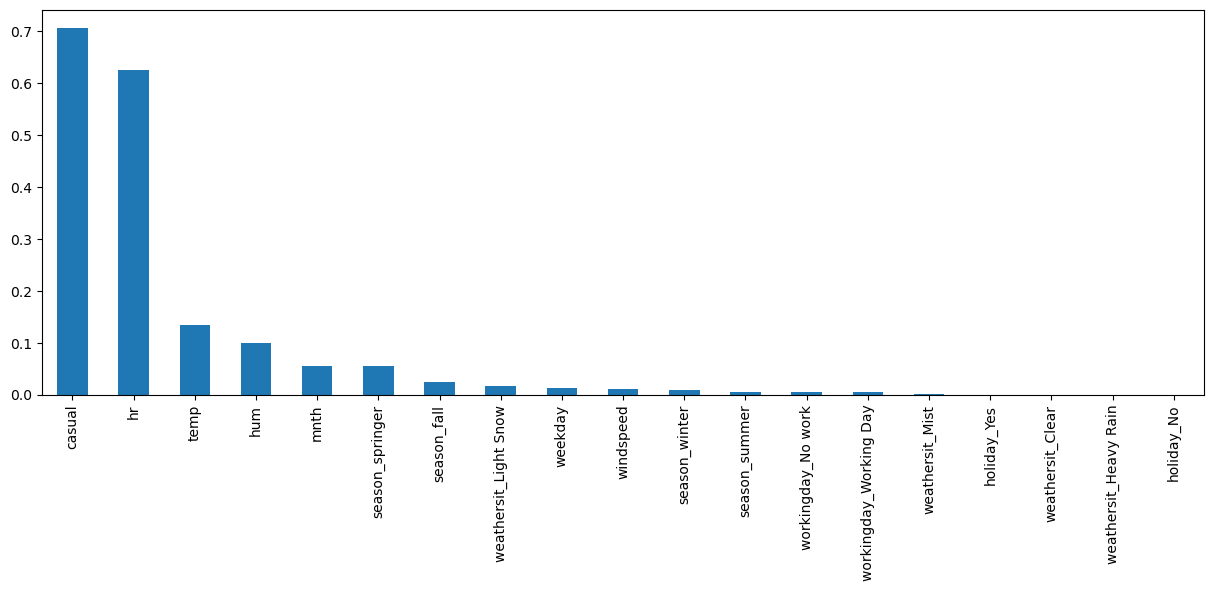

In [56]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [57]:
from sklearn.feature_selection import SelectPercentile
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), Y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x00000193B1333430>)

In [58]:
selected_top_columns.get_support()

array([False,  True, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [59]:
X_train.columns[selected_top_columns.get_support()]

Index(['hr', 'temp', 'hum', 'casual'], dtype='object')

# Information gain - Mutual information In Regression - Here only 4 features are selected as shown above

# 4.  Recursive Feature Elimination with Logistic regression 

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
rfe = RFE(LogisticRegression())

In [62]:
rfe.fit(X_train,Y_train)

RFE(estimator=LogisticRegression())

In [63]:
rfe_df = pd.DataFrame(rfe.ranking_).T
rfe_df.columns = x.columns
rfe_df

,mnth,hr,weekday,temp,hum,windspeed,casual,season_fall,season_springer,season_summer,season_winter,holiday_No,holiday_Yes,workingday_No work,workingday_Working Day,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist
0,1,1,1,4,1,9,1,6,1,3,7,1,10,1,1,2,11,8,5


In [64]:
rfe_df = pd.DataFrame({
    'Ranking' : rfe.ranking_,
    'Features' : x.columns
})
rfe_df

,Ranking,Features
0,1,mnth
1,1,hr
2,1,weekday
3,4,temp
4,1,hum
5,9,windspeed
6,1,casual
7,6,season_fall
8,1,season_springer
9,3,season_summer


In [65]:
rfe_df[rfe_df['Ranking']==1]

,Ranking,Features
0,1,mnth
1,1,hr
2,1,weekday
4,1,hum
6,1,casual
8,1,season_springer
11,1,holiday_No
13,1,workingday_No work
14,1,workingday_Working Day


# Recursive Feature Elimination with Logistic regression show 9 columns which can be used for further analysis.

# 5. Recursive Feature Elimination with Decision Tree

In [66]:
!pip install yellowbrick

In [67]:
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import rfecv

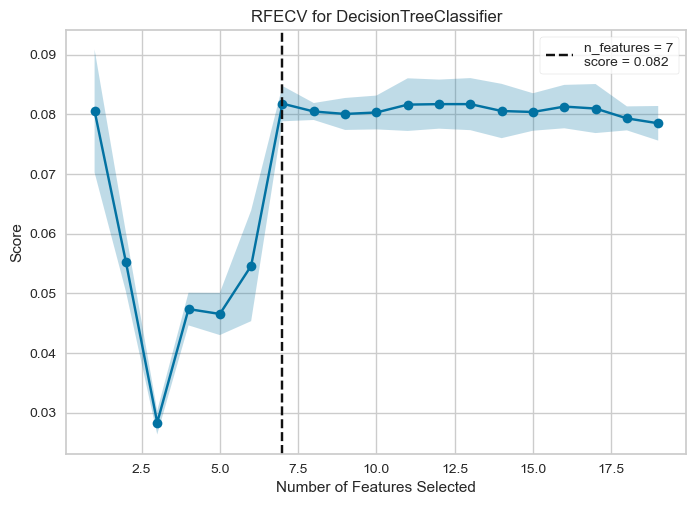

In [68]:
rfe_dt = rfecv(DecisionTreeClassifier(),X_train,Y_train)

In [69]:
rfe_dt.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  6, 10,  5,  7, 12, 11,  8,  4,  2, 13,
        9,  3])

In [70]:
rfe_df = pd.DataFrame({
    'Ranking' : rfe_dt.ranking_,
    'Features' : x.columns
})
rfe_df

,Ranking,Features
0,1,mnth
1,1,hr
2,1,weekday
3,1,temp
4,1,hum
5,1,windspeed
6,1,casual
7,6,season_fall
8,10,season_springer
9,5,season_summer


In [71]:
rfe_df[rfe_df['Ranking']==1]

,Ranking,Features
0,1,mnth
1,1,hr
2,1,weekday
3,1,temp
4,1,hum
5,1,windspeed
6,1,casual


Here's the table summarizing the feature selection techniques and the selected features for each technique:

| Technique         | Selected Features                            |
|-------------------|----------------------------------------------|
| Correlation       | Each and every column (All features are unique) |
| Chi2              | All features except 'Hr' and 'Casual'         |
| Information Gain  | 'Hr', 'Temp', 'Hum', 'Casual'                 |
| RFE (Logistic Reg)| 'Mnth', 'Hr', 'Weekday', 'Hum', 'Casual', 'Season_springer', 'Holiday_No', 'Workingday_No work', 'Workingday_Working Day' |
| RFE (Decision Tree)| 'Mnth', 'Hr', 'Weekday', 'Temp', 'Hum', 'Windspeed', 'Casual' |

Model building to be done...

In [72]:
X_train.head(10)

,mnth,hr,weekday,temp,hum,windspeed,casual,season_fall,season_springer,season_summer,season_winter,holiday_No,holiday_Yes,workingday_No work,workingday_Working Day,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist
4796,7,18,6,0.92,0.40,0.2239,62.0,1,0,0,0,1,0,1,0,1,0,0,0
10061,2,7,3,0.26,0.81,0.1343,11.0,0,1,0,0,1,0,0,1,0,0,0,1
13156,7,9,6,0.84,0.59,0.1642,69.0,1,0,0,0,1,0,1,0,1,0,0,0
9342,1,4,1,0.20,0.51,0.1343,0.0,0,1,0,0,1,0,0,1,1,0,0,0
8832,1,20,0,0.30,0.52,0.1642,7.0,0,1,0,0,1,0,1,0,1,0,0,0
2229,4,18,4,0.48,0.55,0.2537,68.0,0,0,1,0,1,0,0,1,1,0,0,0
12239,5,4,3,0.62,0.88,0.1343,0.0,0,0,1,0,1,0,0,1,0,0,0,1
4697,7,15,2,0.88,0.44,0.1940,48.0,1,0,0,0,1,0,0,1,1,0,0,0
5658,8,5,1,0.56,0.73,0.1343,0.0,1,0,0,0,1,0,0,1,1,0,0,0
9778,2,9,5,0.26,1.00,0.0000,8.0,0,1,0,0,1,0,0,1,0,0,0,1


In [73]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [74]:
# Create a StandardScaler object
scaler = StandardScaler()

In [75]:
# Select the variables to scale and normalize
vars_to_scale = ["temp", "hum", "windspeed","cnt","casual"]

In [76]:
# Scale the variables
bike_df2 [vars_to_scale] = scaler.fit_transform(bike_df2[vars_to_scale])

# Create a MinMaxScaler object
scaler = MinMaxScaler()

In [77]:
# Normalize the variables
bike_df2[vars_to_scale] = scaler.fit_transform(bike_df2[vars_to_scale])

# View the scaled and normalized dataset
print(bike_df2.head())

   mnth  hr  weekday      temp   hum  windspeed    casual       cnt  \
0     1   0        6  0.224490  0.81   0.000000  0.021583  0.019678   
1     1   1        6  0.204082  0.80   0.000000  0.057554  0.062612   
3     1   3        6  0.224490  0.75   0.000000  0.021583  0.014311   
4     1   4        6  0.224490  0.75   0.000000  0.000000  0.000000   
5     1   5        6  0.224490  0.75   0.105325  0.000000  0.000000   

   season_fall  season_springer  season_summer  season_winter  holiday_No  \
0            0                1              0              0           1   
1            0                1              0              0           1   
3            0                1              0              0           1   
4            0                1              0              0           1   
5            0                1              0              0           1   

   holiday_Yes  workingday_No work  workingday_Working Day  weathersit_Clear  \
0            0                

In [78]:
bike_df2.head()

,mnth,hr,weekday,temp,hum,windspeed,casual,cnt,season_fall,season_springer,season_summer,season_winter,holiday_No,holiday_Yes,workingday_No work,workingday_Working Day,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist
0,1,0,6,0.224490,0.81,0.000000,0.021583,0.019678,0,1,0,0,1,0,1,0,1,0,0,0
1,1,1,6,0.204082,0.80,0.000000,0.057554,0.062612,0,1,0,0,1,0,1,0,1,0,0,0
3,1,3,6,0.224490,0.75,0.000000,0.021583,0.014311,0,1,0,0,1,0,1,0,1,0,0,0
4,1,4,6,0.224490,0.75,0.000000,0.000000,0.000000,0,1,0,0,1,0,1,0,1,0,0,0
5,1,5,6,0.224490,0.75,0.105325,0.000000,0.000000,0,1,0,0,1,0,1,0,0,0,0,1


In [79]:
bike_df2.columns

Index(['mnth', 'hr', 'weekday', 'temp', 'hum', 'windspeed', 'casual', 'cnt',
       'season_fall', 'season_springer', 'season_summer', 'season_winter',
       'holiday_No', 'holiday_Yes', 'workingday_No work',
       'workingday_Working Day', 'weathersit_Clear', 'weathersit_Heavy Rain',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [80]:
bike_df2.columns = bike_df2.columns.str.replace(" ", "")
bike_df2.columns

Index(['mnth', 'hr', 'weekday', 'temp', 'hum', 'windspeed', 'casual', 'cnt',
       'season_fall', 'season_springer', 'season_summer', 'season_winter',
       'holiday_No', 'holiday_Yes', 'workingday_Nowork',
       'workingday_WorkingDay', 'weathersit_Clear', 'weathersit_HeavyRain',
       'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [82]:
y_train = Y_train
y_test = Y_test

In [88]:
#Create and fit a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Create and fit a decision tree regression model
dt_model = DecisionTreeRegressor(random_state=69)
dt_model.fit(X_train, y_train)

# Create and fit a random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=96)
rf_model.fit(X_train, y_train)

# Create and fit a gradient boosting regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)
gb_model.fit(X_train, y_train)

# Create and fit a K-Nearest Neighbors regression model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Create and fit a Support Vector regression model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

models = [lr_model, dt_model, rf_model, gb_model, knn_model, svr_model]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'K-Nearest Neighbors', 'Support Vector']

# Initialize lists to store the results
train_r2_scores = []
test_r2_scores = []
mse_scores = []

for model in models:
    # Calculate R-squared scores
    train_r2 = r2_score(y_train, model.predict(X_train))
    test_r2 = r2_score(y_test, model.predict(X_test))
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

    # Calculate MSE scores
    mse = mean_squared_error(y_test, model.predict(X_test))
    mse_scores.append(mse)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Train R-squared': train_r2_scores,
    'Test R-squared': test_r2_scores,
    'MSE': mse_scores
})

# Display the results
print(results_df)

# Find the index of the model with the highest test R-squared score
best_model_index = results_df['Test R-squared'].idxmax()

# Get the details of the best model
best_model = results_df.loc[best_model_index]

# Display the best model
print("\n\nBest Model:")
print(best_model)

                 Model  Train R-squared  Test R-squared           MSE
0    Linear Regression         0.640093        0.651050   9598.888803
1        Decision Tree         1.000000        0.849882   4129.439639
2        Random Forest         0.988573        0.924796   2068.701178
3    Gradient Boosting         0.720862        0.724701   7572.910637
4  K-Nearest Neighbors         0.899880        0.848735   4161.000938
5       Support Vector         0.587605        0.595430  11128.891190


Best Model:
Model              Random Forest
Train R-squared         0.988573
Test R-squared          0.924796
MSE                  2068.701178
Name: 2, dtype: object


In [89]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'n_estimators': sp_randint(100, 1000),
    'max_depth': sp_randint(5, 20),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 10),
}

# Create a Random Forest Regression model
rf = RandomForestRegressor()

# Perform randomized search to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, cv=10, n_iter=10, scoring='r2')
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding R-squared score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best R-squared Score: ", random_search.best_score_)

Best Hyperparameters:  {'max_depth': 17, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 547}
Best R-squared Score:  0.9177832985152344


In [90]:
# Create a Random Forest Regression model with the best hyperparameters
rf = RandomForestRegressor(n_estimators=random_search.best_params_['n_estimators'],
                            max_depth=random_search.best_params_['max_depth'],
                            min_samples_split=random_search.best_params_['min_samples_split'],
                            min_samples_leaf=random_search.best_params_['min_samples_leaf'])

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate R-squared scores
train_r2 = r2_score(y_train, rf.predict(X_train))
test_r2 = r2_score(y_test, y_pred)

# Calculate MSE scores
mse = mean_squared_error(y_test, y_pred)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Data': ['Train', 'Test'],
    'R-squared': [train_r2, test_r2],
    'MSE': [mse, mse]
})

# Display the results
print(results_df)

    Data  R-squared          MSE
0  Train   0.963334  2048.431063
1   Test   0.925533  2048.431063


In [91]:
import pickle

# Open a file,

file = open('rf.pkl', 'wb')
pickle.dump(rf, file)